<a href="https://colab.research.google.com/github/Jimmy-Rais/Machine-Learning/blob/main/Housing_Price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import io
from google.colab import files

In [2]:
#Load the dataset
uploaded=files.upload()

Saving housing.csv to housing.csv


In [3]:
df=pd.read_csv(io.BytesIO(uploaded['housing.csv']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

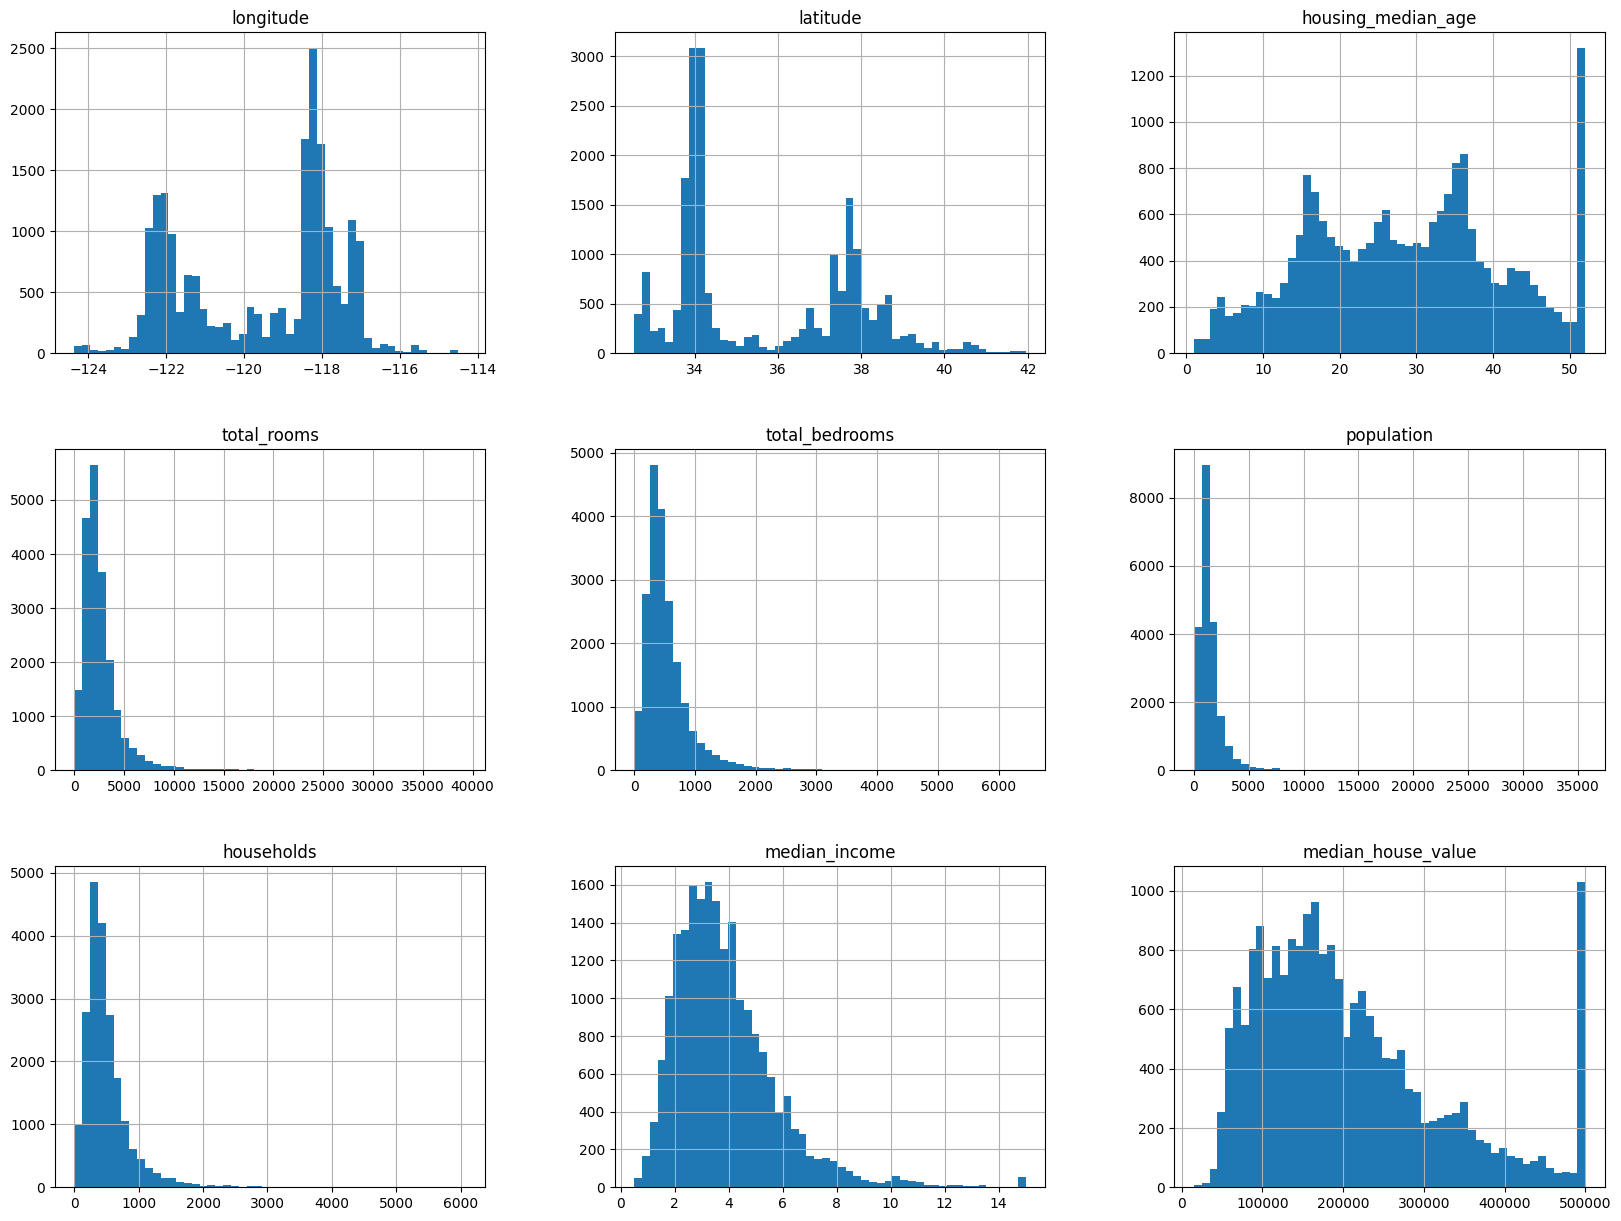

In [4]:
# Understand the dataset
df.head()
df.info()# Data types of all the features and targets
df.describe() #Stats of numerical features
df['ocean_proximity'].value_counts()
df.hist(bins=50,figsize=(20,15)) #Bell shaped curves are preferable

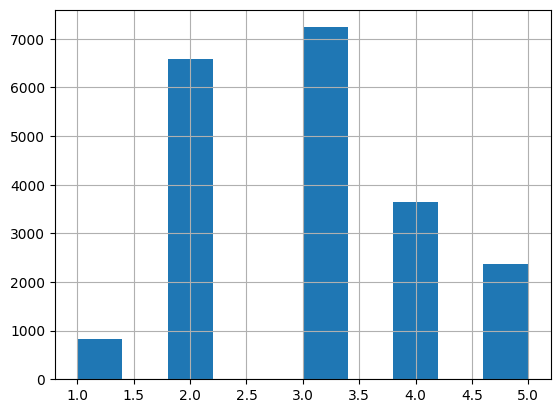

In [7]:
# Data spliting
from sklearn.model_selection import StratifiedShuffleSplit
#Create Representative startas
df['income_cat']=pd.cut(df["median_income"],
                        bins=[0,1.5,3.0,4.5,6,np.inf],
                        labels=[1,2,3,4,5]
                        )
df["income_cat"].hist()
#Stratified sampling
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=40)
for train_index,test_index in split.split(df,df['income_cat']):
  strat_train_set=df.loc[train_index]
  strat_test_set=df.loc[test_index]
#INCOME CATEGORY IN TEST SET
strat_test_set['income_cat'].value_counts()
len(strat_test_set)
#Remove the income Category
for set_ in (strat_train_set,strat_test_set):
  set_.drop("income_cat",axis=1,inplace=True)

<Axes: xlabel='longitude', ylabel='latitude'>

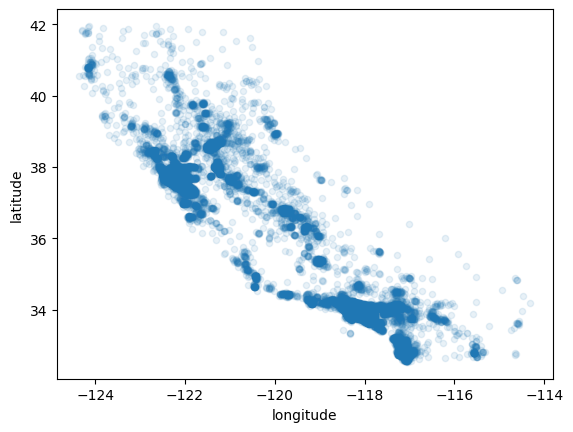

In [10]:
#Data visualization
df=strat_train_set.copy()
#Latitude vs Longitude
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)